PCA:
[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.61275523 -0.01472994]
 [-2.78610927  0.235112  ]
 [-3.22380374  0.51139459]
 [-2.64475039 -1.17876464]
 [-2.38603903 -1.33806233]
 [-2.62352788 -0.81067951]
 [-2.64829671 -0.31184914]
 [-2.19982032 -0.87283904]
 [-2.5879864  -0.51356031]
 [-2.31025622 -0.39134594]
 [-2.54370523 -0.43299606]
 [-3.21593942 -0.13346807]
 [-2.30273318 -0.09870885]
 [-2.35575405  0.03728186]
 [-2.50666891  0.14601688]
 [-2.46882007 -0.13095149]
 [-2.56231991 -0.36771886]
 [-2.63953472 -0.31203998]
 [-2.63198939  0.19696122]
 [-2.58739848  0.20431849]
 [-2.4099325  -0.41092426]
 [-2.64886233 -0.81336382]
 [-2.59873675 -1.09314576]
 [-2.63692688  0.12132235]
 [-2.86624165 -0.06936447]
 [-2.62523805 -0.599370

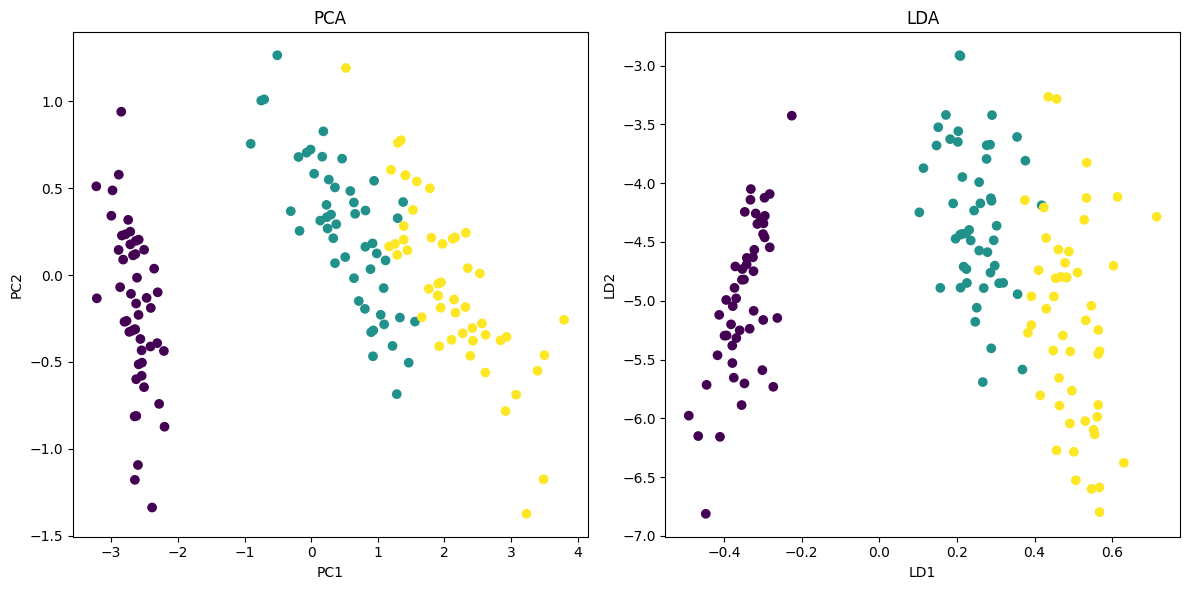

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Compute the mean of the data
        self.mean = np.mean(X, axis=0)
        
        # Center the data by subtracting the mean
        X = X - self.mean
        
        # Compute the covariance matrix
        cov_matrix = np.cov(X.T)
        
        # Compute the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Sort the eigenvalues and corresponding eigenvectors in descending order
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # Store the first n_components eigenvectors
        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # Center the data by subtracting the mean
        X = X - self.mean
        
        # Project the data onto the principal components
        return np.dot(X, self.components.T)


class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.scaling_factor = None
        self.components = None

    def fit(self, X, y):
        # Compute the class means
        class_means = []
        for label in np.unique(y):
            class_means.append(np.mean(X[y == label], axis=0))
        class_means = np.array(class_means)
        
        # Compute the overall mean
        overall_mean = np.mean(X, axis=0)
        
        # Center the class means by subtracting the overall mean
        class_means_centered = class_means - overall_mean
        
        # Compute the within-class scatter matrix
        scatter_within = np.zeros((X.shape[1], X.shape[1]))
        for label in np.unique(y):
            class_samples = X[y == label]
            scatter_within += np.cov(class_samples.T)
        
        # Compute the between-class scatter matrix
        scatter_between = np.cov(class_means_centered.T)
        
        # Compute the eigenvalues and eigenvectors of (scatter_within^-1) * scatter_between
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(scatter_within).dot(scatter_between))
        
        # Sort the eigenvalues and corresponding eigenvectors in descending order
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # Store the first n_components eigenvectors
        self.components = eigenvectors[:self.n_components]
        
        # Compute the scaling factor for the LDA components
        self.scaling_factor = np.sqrt(eigenvalues[:self.n_components])

    def transform(self, X):
        # Project the data onto the LDA components
        return np.dot(X, self.components.T) / self.scaling_factor


# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# Apply LDA
lda = LDA(n_components=2)
lda.fit(X, y)
X_lda = lda.transform(X)

# Print the projected data
print("PCA:")
print(X_pca)
print()
print("LDA:")
print(X_lda)

# Plot the projected data
plt.figure(figsize=(12, 6))

# PCA plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')

# LDA plot
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA')

plt.tight_layout()
plt.show()
